### Visualize the combining matrix
It is extracted from the first set of weights (properly normalized) of the DNN

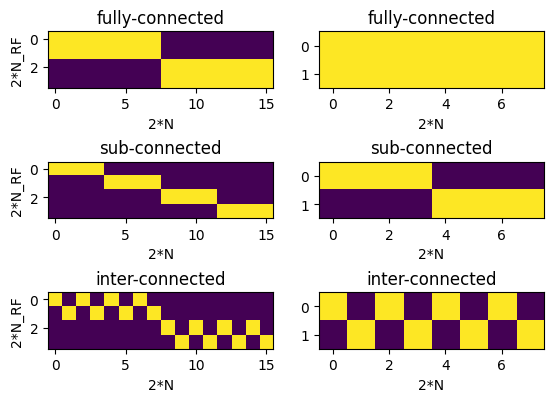

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Parametri di esempio
N_RF = 2  # Numero di RF chains
N = 8    # Numero di antenne

############## fully-connected ###############
w = torch.ones(2 * N_RF, 2 * N)
w[N_RF:, :N] = 0
w[:N_RF, N:] = 0
w_rf = w[:N_RF, :N] + 1j * w[N_RF:N_RF * 2, N:N * 2]
norm_factor = torch.abs(w_rf) * torch.sqrt(torch.tensor(N, dtype=torch.float32))
w[:N_RF, :N] /= norm_factor
w[N_RF:N_RF * 2, N:N * 2] /= norm_factor

plt.subplot(321)
plt.imshow(w)
plt.title('fully-connected')
plt.xlabel('2*N')
plt.ylabel('2*N_RF')
# plt.colorbar()

plt.subplot(322)
plt.imshow(np.abs(w_rf),vmin=0)
plt.title('fully-connected')
plt.xlabel('2*N')
# plt.ylabel('2*N_RF')
plt.yticks(np.arange(0,N_RF,1))
# plt.colorbar()

############## sub-connected ###############
w = torch.ones(2 * N_RF, 2 * N)
n_ant_per_rf = int(np.floor(N/N_RF))
w = torch.ones(2 * N_RF, 2 * N)
mask = np.kron(np.eye(2*N_RF),np.ones((1,n_ant_per_rf)))
w = w * mask
w_rf = w[:N_RF, :N] + 1j * w[N_RF:N_RF * 2, N:N * 2]
norm_factor = torch.clamp(torch.abs(w_rf), min=1e-8) * torch.sqrt(torch.tensor(N / N_RF, dtype=torch.float32))
w[:N_RF, :N] /= norm_factor
w[N_RF:N_RF * 2, N:N * 2] /= norm_factor

plt.subplot(323)
plt.imshow(w)
plt.title('sub-connected')
plt.xlabel('2*N')
plt.ylabel('2*N_RF')
# plt.colorbar()

plt.subplot(324)
plt.imshow(np.abs(w_rf))
plt.title('sub-connected')
plt.xlabel('2*N')
# plt.ylabel('2*N_RF')
plt.yticks(np.arange(0,N_RF,1))
# plt.colorbar()

############## inter-connected ###############
w = torch.ones(2 * N_RF, 2 * N)
indices = torch.arange(N) % N_RF
interleaved_mask = torch.zeros_like(w)
interleaved_mask[indices, torch.arange(N)] = 1.0
interleaved_mask[N_RF + indices, N + torch.arange(N)] = 1.0
w = w * interleaved_mask
w_rf = w[:N_RF, :N] + 1j * w[N_RF:N_RF * 2, N:N * 2]  # shape (N_RF, N)
norm_factor = torch.clamp(torch.abs(w_rf), min=1e-8) * torch.sqrt(torch.tensor(N / N_RF, dtype=torch.float32))
w[:N_RF, :N] /= norm_factor
w[N_RF:N_RF * 2, N:N * 2] /= norm_factor

plt.subplot(325)
plt.imshow(w)
plt.title('inter-connected')
plt.xlabel('2*N')
plt.ylabel('2*N_RF')
# plt.colorbar()

plt.subplot(326)
plt.imshow(np.abs(w_rf))
plt.title('inter-connected')
plt.xlabel('2*N')
# plt.ylabel('2*N_RF')
plt.yticks(np.arange(0,N_RF,1))
# plt.colorbar()

plt.show()

In [3]:
w = torch.ones(2 * N_RF, 2 * N)
indices = torch.arange(N) % N_RF
interleaved_mask = torch.zeros_like(w)
interleaved_mask[indices, torch.arange(N)] = 1.0
interleaved_mask[N_RF + indices, N + torch.arange(N)] = 1.0
w = w * interleaved_mask
w_rf = w[:N_RF, :N] + 1j * w[N_RF:N_RF * 2, N:N * 2]  # shape (N_RF, N)
norm_factor = torch.clamp(torch.abs(w_rf), min=1e-8) * torch.sqrt(torch.tensor(N / N_RF, dtype=torch.float32))
w[:N_RF, :N] /= norm_factor
w[N_RF:N_RF * 2, N:N * 2] /= norm_factor

This code shows the distribution of the uniformly distributed points

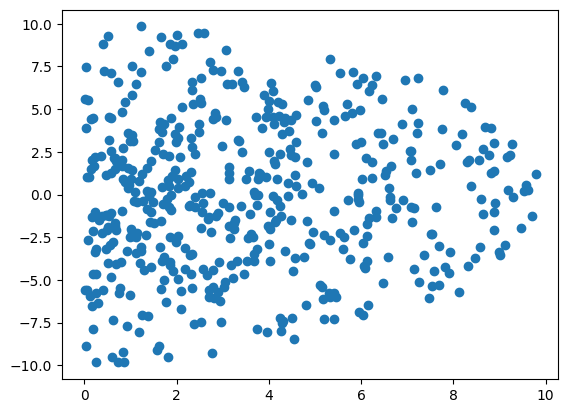

In [19]:
range_limits = [1,10]
n_pts = 500
x_ = []
y_ = []
for i in range(n_pts):
    r = np.random.uniform(range_limits[0], range_limits[1])
    theta = np.random.uniform(-90,90)
    theta = np.sin(np.deg2rad(theta))
    x_.append(r * np.sqrt(1 - theta**2))
    y_.append(r * theta)

plt.scatter(x_,y_)
plt.show()